# 1.2.6: Bike Share (Interpretation)

<br>



---



*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>



---



Now that we have the simulation working as we'd like, we want to use it.  In this notebook we'll define a metric for the system and optimize the system by manipulating the our independent variables (the initial state).  In short, we'll use our simulation to explore the behavior of the system!

In [1]:
# @title
import pandas as pd
import numpy.random as npr

def change_func(state, ptm, pta):
    if npr.random() < ptm:
        state = bike_to_moline(state)
    if npr.random() < pta:
        state = bike_to_augie(state)
    return state

def run_simulation(p1, p2, iAug, iMol, num_steps):
    state = pd.Series(dict(augie=iAug,moline=iMol,augie_empty=0,moline_empty=0,
                           clock=0),name="Number of Bikes")
    for i in range(num_steps):
        state = change_func(state, p1, p2)
    return state



---



## Interpretation: Using 'metrics'

Our aim is to *optimize* this system: to find the ideal number of bikes to put at Augie at the beginning of the day.  This is one form of the last step of the modeling process: interpretation of the model.

<br>

In order to optimize, we need to define an 'ideal' system in a way that can be quantified.  The way we do this is with a *metric*.  Maybe we don't like angry customers, so we might want to minimize the number of customers who show up to get a bike but don't find one.  Or maybe if we are charging a fee to use the bike, we want to maximize the number of bikes that get used in one day.  

<br>

Notice that these are not necessarily the same thing: one metric might favor one set-up while another favors a different set-up.  So it's important to choose a metric carefully.

## Defining and calculating a bikeshare metric

Let's assume this is a public service rather than a money-making scheme, and focus on the number of unhappy customers.

<br>

How are we going to count unhappy customers?  We need to know how many times someone shows up for a bike but finds the rack empty.   

<br>

First, we need a way to count this, so we'll add two counting variables to our state.  One will count the unhappy customers in Moline, the other at Augie, and at the beginning of the day they will both be 0.  The state object is a good place to store this because we are already accessing the object during every time step.  

In [2]:
bikeshare = pd.Series(dict(augie=12,moline=0,moline_empty=0, augie_empty = 0),name="Number of Bikes")

Now we need to know when to increase those values.  Fortunately, our solution for ensuring that the number of bikes was never negative already identifies times when a customer arrives to find an empty rack.  We just need to add to our counting variables everytime this happens.   An `else` statement makes this easy:

In [3]:
def bike_to_augie(state):
    if state.moline > 0:
        state.moline -= 1
        state.augie += 1
    else:
        state.moline_empty +=1
    return state

If a customer arrives at the Moline station, the function either subtracts a bike (if there is one) or adds 1 to `moline_empty` (if there is not).

<br>

We can test it by calling `bike_to_augie`.  Noting the initial state that we defined above, we can see that after this update, there should be 12 bikes at Augustana, no bikes at Moline, and one unhappy customer at Moline:

In [4]:
bike_to_augie(bikeshare)

augie           12
moline           0
moline_empty     1
augie_empty      0
Name: Number of Bikes, dtype: int64

Looks good!

🟨 🟨 Active Reading: In the cell below, write out the new `bike_to_moline()` function that matches the new `bike_to_augie()`.

In [5]:
# Bike_to_moline function
def bike_to_moline(state):


## Comparing Systems with Independent Variables

Our driving question of our simulation was, "How many bikes should we put at Augie at the beginning of the day?"  With a metric in place that defines a successful simulation, we can now answer that question!

<br>

To find the optimal solution, we want to "sweep" through possible initial states in order to find the state that produces the best value for our metric.  In our case: how should we distribute our bikes every morning to minimize the number of unhappy customers?

### Sweeping Parameters

Now we want to run a set of simulations, each with a different initial state, as quickly as possible.  This will allow us to compare these situations, and determine which produces the fewest unhappy customers (our *metric*).  

<br>

Now that we know about loops and arguments, we can use them together, changing the arguments of our `run_simulation` everytime through the loop:

In [7]:
# Define the parameters
# These are tagged with _g to remind us that they are global variables
ptm_g = 0.5
pta_g = 0.4
num_steps_g = 60

# Run 13 simulations, ranging the initial conditions from all the bikes at Augie
# through all the bikes in Moline
for i in range(13):
    final_state = run_simulation(ptm_g, pta_g, i, 12-i, num_steps_g)
    # This uses the "tab" string "\t" to make the results more readable
    print("Initial Augie bikes", i, "\t","\t", "Unhappy at Augie",
          final_state.augie_empty, "\t", "Unhappy at Moline", final_state.moline_empty)

Initial Augie bikes 0 	 	 Unhappy at Augie 6 	 Unhappy at Moline 0
Initial Augie bikes 1 	 	 Unhappy at Augie 2 	 Unhappy at Moline 0
Initial Augie bikes 2 	 	 Unhappy at Augie 10 	 Unhappy at Moline 0
Initial Augie bikes 3 	 	 Unhappy at Augie 5 	 Unhappy at Moline 0
Initial Augie bikes 4 	 	 Unhappy at Augie 13 	 Unhappy at Moline 0
Initial Augie bikes 5 	 	 Unhappy at Augie 1 	 Unhappy at Moline 0
Initial Augie bikes 6 	 	 Unhappy at Augie 4 	 Unhappy at Moline 0
Initial Augie bikes 7 	 	 Unhappy at Augie 8 	 Unhappy at Moline 0
Initial Augie bikes 8 	 	 Unhappy at Augie 3 	 Unhappy at Moline 0
Initial Augie bikes 9 	 	 Unhappy at Augie 2 	 Unhappy at Moline 0
Initial Augie bikes 10 	 	 Unhappy at Augie 0 	 Unhappy at Moline 3
Initial Augie bikes 11 	 	 Unhappy at Augie 0 	 Unhappy at Moline 4
Initial Augie bikes 12 	 	 Unhappy at Augie 2 	 Unhappy at Moline 2


Each time through the loop, we run a simulation with a different value
of number of initial bikes at Augie and the same value of `ptm` and `pta`. Then we print the initial number of bikes at Augie and the
number of unhappy customers at Augustana and Moline.

<br>

Run this cell multiple times, and make sure the results make sense to you.  Why are the results different each time?  Why does there tend to be more unhappy customers at Augie?  Why are there (generally) fewer unhappy customers as `i` gets larger?




### Storing and plotting the sweep

To visualize this data, we need to store the data rather than just printing it out.

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_2/If_only.PNG width = 300>
</center>

 <br>

Oh, wait!  We could use a `Series`! 😏 In this case, the labels will be the different independent variable values (i.e. the initial bikes at Augie), and the values will be the number of unhappy customers for that simulation.  We'll call the Series 'sweep':

In [8]:
sweep = pd.Series([],name = "Unhappy Customers", dtype=object)
sweep.index.name = "Initial Bikes at Augie"

And add values like this:

In [11]:
for i in range(13):
    final_state = run_simulation(ptm_g, pta_g, i, 12-i, num_steps_g)
    sweep[i] = final_state.augie_empty + final_state.moline_empty
sweep

Initial Bikes at Augie
0      2
1     18
2      2
3      1
4      4
5      4
6      3
7      0
8      8
9      0
10     0
11     0
12     1
Name: Unhappy Customers, dtype: int64

We can plot the results like this:

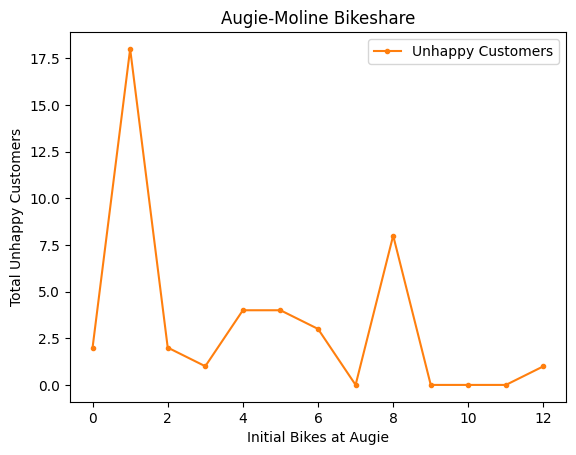

In [12]:
sweep.plot(xlabel=sweep.index.name, ylabel="Total Unhappy Customers",
            title='Augie-Moline Bikeshare', color='C1',legend=True,marker='.');

Generally, when the number of initial bikes at Augie is high, there are fewer unhappy customers (since the tendency is for more bikes to go to Moline than vice versa).

<br>

The line is jagged because the simulation is based on random numbers. Sometime we get lucky and there are relatively few unhappy customers; other times are are unlucky and there are more.   How can we get more definitive answers?  We'll continue to iterate our model in the exercises to solve this problem.

<br>

---

## Exercises

---

<br>

🟨 🟨

### Exercise 1

Run the sweep multiple times, and try to get a sense of the patterns (use both the version that prints out and the one that creates a plot).  There tend to be more unhappy at one place.  Which place? Why are there more unhappy customers at Augie?  

✅ ✅ Put your answer here

---

<br>

🟨 🟨

### Exercise 2
Continue to analyze the results.  Are there generally more unhappy customers when there are a lot of bikes initially at Augie, or when there are only a few?   Why is this?  What do you think the optimal number of initial bikes at Augie would be?

✅ ✅ Put your answer here

---

<br>

🟨 🟨

### Exercise 3

You have probably noticed the difficulty of analyzing a stochastic simulation (that is, a simulation with an element of randomness).  What could we do to make these results more reliable?   How could we define a metric that produced more stable results?

✅ ✅ Put your answer here